In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-building-energy-efficiency-ratings/geojson_lookup_rows.csv
/kaggle/input/nyc-building-energy-efficiency-ratings/energy_disclosure_2021_rows.csv


In [3]:
geojson_lookup_data = pd.read_csv('/kaggle/input/nyc-building-energy-efficiency-ratings/geojson_lookup_rows.csv')
energy_disclosure_data = pd.read_csv('/kaggle/input/nyc-building-energy-efficiency-ratings/energy_disclosure_2021_rows.csv')

In [4]:
print("Summary statistics of the energy disclosure data:")
print(energy_disclosure_data.describe())

Summary statistics of the energy disclosure data:
       10_Digit_BBL  Street_Number  DOF_Gross_Square_Footage  \
count  1.000000e+02     100.000000              1.000000e+02   
mean   1.000952e+09     123.230000              5.103363e+05   
std    2.232645e+06     137.155508              5.303829e+05   
min    1.000050e+09       1.000000              2.548300e+04   
25%    1.000160e+09      25.000000              2.171008e+05   
50%    1.000220e+09      64.000000              3.611830e+05   
75%    1.000290e+09     202.750000              5.844400e+05   
max    1.007620e+09     555.000000              3.678000e+06   

       Energy_Star_1-100_Score  
count               100.000000  
mean                 63.250000  
std                  27.262056  
min                   1.000000  
25%                  43.500000  
50%                  75.500000  
75%                  83.250000  
max                 100.000000  


In [5]:
print("Summary statistics of the geojson_lookup_data:")
print(geojson_lookup_data.describe())

Summary statistics of the geojson_lookup_data:
       10_Digit_BBL   Latitude  Longitude
count  1.000000e+02  70.000000  70.000000
mean   1.164010e+09 -74.005260  40.711048
std    5.704976e+08   0.009937   0.014468
min    1.000130e+09 -74.014611  40.631845
25%    1.000680e+09 -74.010148  40.707104
50%    1.001713e+09 -74.007458  40.710277
75%    1.002233e+09 -74.003953  40.719267
max    4.027848e+09 -73.955008  40.740699


In [6]:
geojson_lookup_data.head()

,10_Digit_BBL,GeoBuilding,Latitude,Longitude
0,3017620041,"{""type"":""Feature"",""geometry"":{""type"":""MultiPol...",-73.955008,40.692556
1,1007017501,NaN,NaN,NaN
2,3021077502,NaN,NaN,NaN
3,1000130001,"{""type"":""Feature"",""geometry"":{""type"":""MultiPol...",-74.014611,40.704959
4,1000130005,"{""type"":""Feature"",""geometry"":{""type"":""MultiPol...",-74.014242,40.705379


In [7]:
energy_disclosure_data.head()

,10_Digit_BBL,Street_Number,Street_Name,DOF_Gross_Square_Footage,Energy_Efficiency_Grade,Energy_Star_1-100_Score
0,1007610020,325,WEST 37 STREET,48843,A,100
1,1007610022,313,WEST 37 STREET,82354,C,62
2,1007610028,307,WEST 37 STREET,102824,B,79
3,1007610033,545,8 AVENUE,166874,A,86
4,1007610037,555,8 AVENUE,162260,A,100


In [8]:
print(geojson_lookup_data.columns)


Index(['10_Digit_BBL', 'GeoBuilding', 'Latitude', 'Longitude'], dtype='object')


In [9]:
print(energy_disclosure_data.columns)


Index(['10_Digit_BBL', 'Street_Number', 'Street_Name',
       'DOF_Gross_Square_Footage', 'Energy_Efficiency_Grade',
       'Energy_Star_1-100_Score'],
      dtype='object')


Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         5
           B       1.00      1.00      1.00         7
           C       1.00      1.00      1.00         2
           D       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



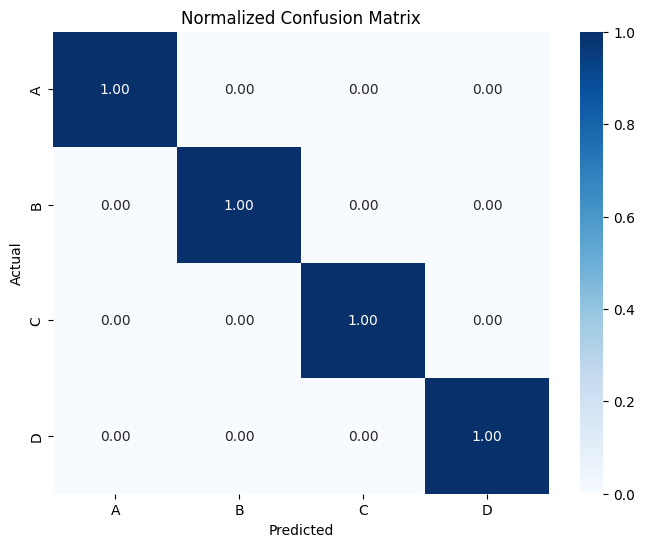

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the datasets
energy_data = pd.read_csv('/kaggle/input/nyc-building-energy-efficiency-ratings/energy_disclosure_2021_rows.csv')
geojson_lookup_data = pd.read_csv('/kaggle/input/nyc-building-energy-efficiency-ratings/geojson_lookup_rows.csv')

# Drop rows with missing values
energy_data.dropna(inplace=True)
geojson_lookup_data.dropna(inplace=True)

# Define features (X) and target (y) for classification
X = energy_data[['Street_Number', 'DOF_Gross_Square_Footage', 'Energy_Star_1-100_Score']]
y = energy_data['Energy_Efficiency_Grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['A', 'B', 'C', 'D'])

# Normalize Confusion Matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=['A', 'B', 'C', 'D'], yticklabels=['A', 'B', 'C', 'D'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()



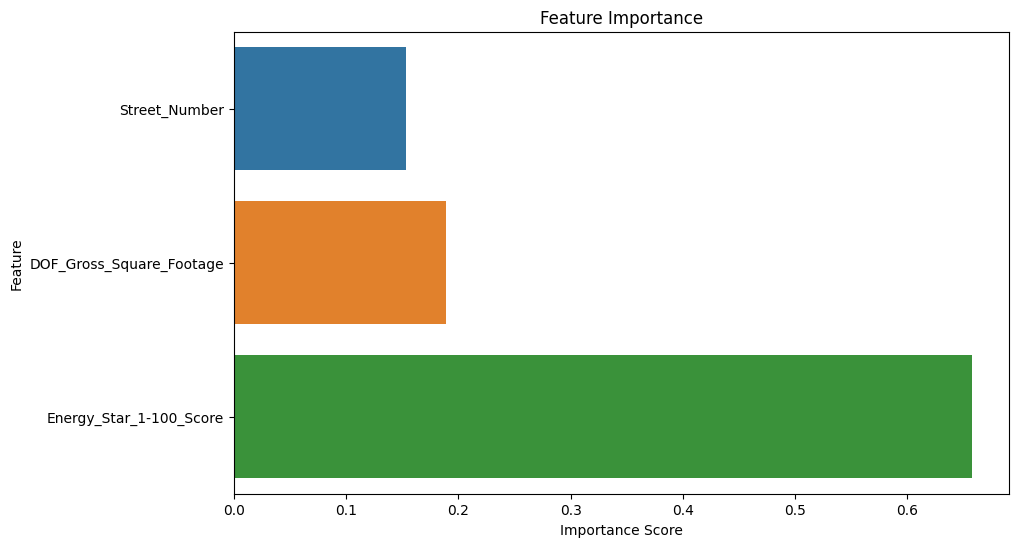

In [11]:
# Feature Importance
feature_importances = clf.feature_importances_
features = X.columns

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


>  Error Analysis
> 
> Analyzing the errors can help us understand where the model is making mistakes and why. We can look at the confusion matrix to identify which classes are most often confused with each other.

In [12]:
# Check class distribution in y_train
class_distribution = y_train.value_counts()
print("Class Distribution in y_train:")
print(class_distribution)

# Adjust class weights in the RandomForestClassifier
class_weights = {cls: 1.0/class_distribution[cls] for cls in class_distribution.index}
clf = RandomForestClassifier(class_weight=class_weights)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Print Classification Report again after handling imbalance
print("Classification Report after handling class imbalance:")
print(classification_report(y_test, y_pred))


Class Distribution in y_train:
Energy_Efficiency_Grade
D    27
B    27
A    18
C     8
Name: count, dtype: int64
Classification Report after handling class imbalance:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         5
           B       1.00      1.00      1.00         7
           C       1.00      0.50      0.67         2
           D       0.86      1.00      0.92         6

    accuracy                           0.95        20
   macro avg       0.96      0.88      0.90        20
weighted avg       0.96      0.95      0.94        20



Fitting 3 folds for each of 6 candidates, totalling 18 fits


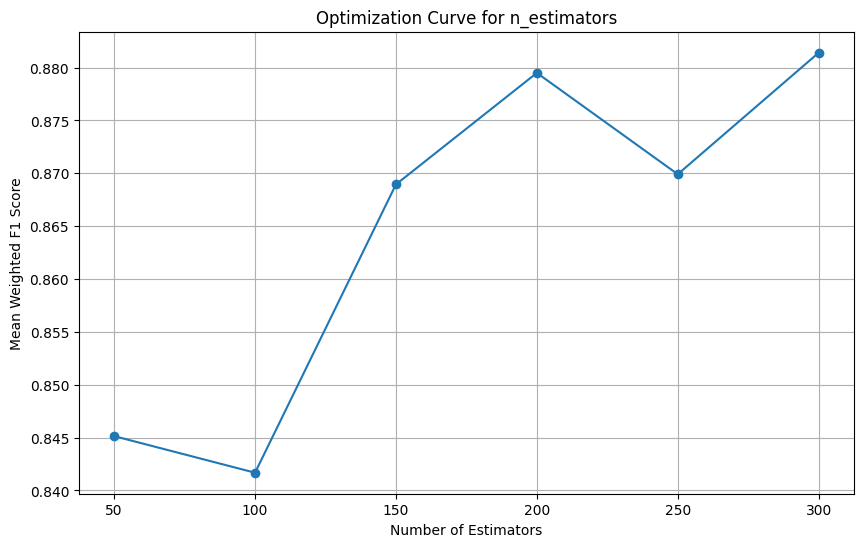

Best parameters: {'n_estimators': 300}
Best score: 0.8814051445630393


In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, make_scorer, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
energy_data = pd.read_csv('/kaggle/input/nyc-building-energy-efficiency-ratings/energy_disclosure_2021_rows.csv')
geojson_lookup_data = pd.read_csv('/kaggle/input/nyc-building-energy-efficiency-ratings/geojson_lookup_rows.csv')

# Drop rows with missing values
energy_data.dropna(inplace=True)
geojson_lookup_data.dropna(inplace=True)

# Define features (X) and target (y) for classification
X = energy_data[['Street_Number', 'DOF_Gross_Square_Footage', 'Energy_Star_1-100_Score']]
y = energy_data['Energy_Efficiency_Grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest classifier
clf = RandomForestClassifier()

# Define the parameter grid
param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300]}

# Initialize Grid Search with F1 score as the metric
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring=make_scorer(f1_score, average='weighted'), n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the results of the grid search
cv_results = grid_search.cv_results_

# Plot the optimization curve
plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_estimators'], cv_results['mean_test_score'], marker='o')
plt.title('Optimization Curve for n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Weighted F1 Score')
plt.grid(True)
plt.show()

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")


In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
import plotly.graph_objects as go
import numpy as np

# Load the datasets
energy_data = pd.read_csv('/kaggle/input/nyc-building-energy-efficiency-ratings/energy_disclosure_2021_rows.csv')
geojson_lookup_data = pd.read_csv('/kaggle/input/nyc-building-energy-efficiency-ratings/geojson_lookup_rows.csv')

# Drop rows with missing values
energy_data.dropna(inplace=True)
geojson_lookup_data.dropna(inplace=True)

# Define features (X) and target (y) for classification
X = energy_data[['Street_Number', 'DOF_Gross_Square_Footage', 'Energy_Star_1-100_Score']]
y = energy_data['Energy_Efficiency_Grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest classifier
clf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [10, 20, 30, 40, 50, None]
}

# Initialize Grid Search with accuracy as the metric
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the results of the grid search
cv_results = grid_search.cv_results_

# Extract mean test scores for each combination of hyperparameters
mean_test_scores = cv_results['mean_test_score']

# Create meshgrid for plotting
n_estimators = param_grid['n_estimators']
max_depth = [str(md) for md in param_grid['max_depth']]
scores_matrix = mean_test_scores.reshape(len(n_estimators), len(max_depth))

# Find the index of the best score
best_index = np.argmax(mean_test_scores)
best_n_estimators = n_estimators[best_index // len(max_depth)]
best_max_depth = max_depth[best_index % len(max_depth)]
best_score = mean_test_scores[best_index]

# Plot 3D Surface
fig = go.Figure(data=[go.Surface(z=scores_matrix, x=n_estimators, y=max_depth, colorscale='Viridis')])

# Add marker for the best score
fig.add_trace(go.Scatter3d(
    x=[best_n_estimators],
    y=[best_max_depth],
    z=[best_score],
    mode='markers+text',
    marker=dict(size=10, color='red', symbol='diamond'),
    text=[f'Best Score: {best_score:.4f}'],
    textposition='top center',
    name='Best Score'
))

fig.update_layout(
    title='3D Optimization Curve',
    scene=dict(
        xaxis_title='Number of Estimators',
        yaxis_title='Max Depth',
        zaxis_title='Mean Accuracy Score'
    ),
    width=800,
    height=600
)

fig.show()

# Best parameters and best score
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits


Best parameters: {'max_depth': 50, 'n_estimators': 150}
Best score: 0.9249762583095916


In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import folium
import json

# Load the datasets
energy_data = pd.read_csv('/kaggle/input/nyc-building-energy-efficiency-ratings/energy_disclosure_2021_rows.csv')
geojson_lookup_data = pd.read_csv('/kaggle/input/nyc-building-energy-efficiency-ratings/geojson_lookup_rows.csv')

# Drop rows with missing values
energy_data.dropna(inplace=True)
geojson_lookup_data.dropna(inplace=True)

# Define features (X) and target (y) for classification
X = energy_data[['Street_Number', 'DOF_Gross_Square_Footage', 'Energy_Star_1-100_Score']]
y = energy_data['Energy_Efficiency_Grade']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the entire dataset
energy_data['Predicted_Grade'] = clf.predict(X)

# Parse the JSON-like string in the second column of geojson_lookup_data
geojson_lookup_data['GeoBuilding'] = geojson_lookup_data['GeoBuilding'].apply(json.loads)

# Merge predicted grades with geojson_lookup_data based on 10_Digit_BBL
merged_data = pd.merge(energy_data, geojson_lookup_data[['10_Digit_BBL', 'GeoBuilding', 'Latitude', 'Longitude']], on='10_Digit_BBL', how='inner')

# Initialize a Folium map centered on New York City
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Define colors for each grade
grade_colors = {
    'A': 'green',
    'B': 'blue',
    'C': 'orange',
    'D': 'red'
}

# Add GeoJSON data to the map with separate fill colors for each grade
for _, row in merged_data.iterrows():
    grade_color = grade_colors.get(row['Predicted_Grade'], 'black')  # Default to black if grade is not found
    folium.GeoJson(
        row['GeoBuilding'],
        style_function=lambda feature, color=grade_color: {
            'fillColor': color,
            'color': 'black',
            'weight': 5,
            'fillOpacity': 0.9
        },
        popup=f"Grade: {row['Predicted_Grade']}, GeoBuilding: {row['GeoBuilding']}"
    ).add_to(nyc_map)

# Save map to an HTML file
nyc_map.save('nyc_energy_efficiency_map.html')

# Display the map (if running in an interactive environment like Jupyter Notebook)
nyc_map


In [16]:
# Print unique values of Predicted_Grade column
print("Unique predicted grades:", merged_data['Predicted_Grade'].unique())


Unique predicted grades: ['A' 'B']
